In [13]:
import pandas as pd
import seaborn as sns
sns.set_theme()

In [14]:
df = pd.read_excel('MSHumanism_CleanQuantData_250625_AC.xlsx', sheet_name='Full Data')
df



,Record ID,Timepoint,PPOS,PPOS-S,PPOS-C,Age:,Gender Identity,Other: Specify,Which Cultural Identities do you identify as? (Select that apply) (choice=Black/African Canadian),"Which Cultural Identities do you identify as? (Select that apply) (choice=East Asian (e.g., Chinese, Japanese, Korean))",...,Unnamed: 25,Unnamed: 26,Please specify if other level of training,Unnamed: 28,Unnamed: 29,Unnamed: 30,"Please list all previous education you have completed (e.g., CEGEP, BSc, MSc, PHD, other professional certification). Please answer in format [degree, year of completion]",Site of study,Do you have an intended specialization (including Family Medicine)?,What is your intended specialization?
0,1,M2 (TCP),88,40,48,21,Female,NaN,Unchecked,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,"CEGEP, 2022",Montreal,Yes,Internal medicine
1,2,M4,75,29,46,42,Female,NaN,Unchecked,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,Graduate studies in Experimental Medicine,Montreal,No,NaN
2,3,M3,76,38,38,30,Male,NaN,Unchecked,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,"Bsc, jd, llm",Montreal,Yes,Dermatology
3,5,M2 (TCP),76,42,34,25,Male,NaN,Unchecked,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,"CEGEP, Bsc, Msc",Montreal,Yes,internal medicine - maybe medical oncology
4,7,M3,61,33,28,27,Male,NaN,Checked,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,BSc Human Kinetics 2020 BSc Translational and...,Montreal,Yes,Anesthesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,207,M3,41,20,21,28,Female,NaN,Checked,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,Bsc Msc,Montreal,No,NaN
134,208,M4,41,28,13,31,Female,NaN,Unchecked,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,"cegep, 2013 bsc, 2015 MSc, 2017 md 2025",Montreal,Yes,family medicine
135,210,M4,56,28,28,28,Female,NaN,Unchecked,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,"cegep in health sciences, 2016 1 year in cine...",Montreal,Yes,I am starting residency in family medicine
136,212,M3,50,36,14,27,Male,NaN,Unchecked,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,"BSc, MSc studies,",Montreal,Yes,Family Medicine + 1 Emergency Medicine


In [15]:
# Remap columns to more workable names
column_rename = {
    'Record ID': 'record_id',
    'Timepoint': 'timepoint',
    'PPOS': 'ppos',
    'PPOS-S': 'ppos_s',
    'PPOS-C': 'ppos_c',
    'Age:': 'age',
    'Gender Identity': 'gender',
    'Other: Specify': 'gender_other',
    'How proficient are you in French?': 'french_proficiency',
    'How proficient are you in English?': 'english_proficiency',
    'Do you speak any other languages? Please specify your proficiency (Fluent, Moderate, Basic). Please answer in format: [Language, Proficiency] for all languages.    ': 'other_languages',
    'Please specify if other level of training': 'other_training',
    'Please list all previous education you have completed (e.g., CEGEP, BSc, MSc, PHD, other professional certification). Please answer in format [degree, year of completion]': 'prior_education',
    'Site of study': 'site_of_study',
    'Do you have an intended specialization (including Family Medicine)?': 'intended_specialization',
    'What is your intended specialization?': 'specialty',
    'Other (Please specify):': 'race_other',
    # Cultural identity columns
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=Black/African Canadian)': 'cultural_black',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=East Asian (e.g., Chinese, Japanese, Korean))': 'cultural_east_asian',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=Indigenous (First Nations, Métis, Inuit))': 'cultural_indigenous',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=Middle Eastern/North African (e.g., Arab, Persian))': 'cultural_middle_eastern',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=Latin American (e.g., Mexican, Brazilian, Coloumbian))': 'cultural_latin_american',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=South Asian (e.g., Indian, Bangladeshi, Sri Lankan))': 'cultural_south_asian',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=South East Asian (e.g. Filipino, Vietnamese, Thai))': 'cultural_southeast_asian',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=White/Caucasian)': 'cultural_white',
    'Which Cultural Identities do you identify as? (Select that apply)   (choice=Other (please specify))': 'cultural_other',
}
# Remove unnamed columns and apply renaming
df = df.loc[:, ~df.columns.str.strip().str.contains('^Unnamed')].rename(columns=column_rename)
df.head()
df.columns

Index(['record_id', 'timepoint', 'ppos', 'ppos_s', 'ppos_c', 'age', 'gender',
       'gender_other', 'cultural_black', 'cultural_east_asian',
       'cultural_indigenous', 'cultural_middle_eastern',
       'cultural_latin_american', 'cultural_south_asian',
       'cultural_southeast_asian', 'cultural_white', 'cultural_other',
       'race_other', 'french_proficiency', 'english_proficiency',
       'other_languages', 'other_training', 'prior_education', 'site_of_study',
       'intended_specialization', 'specialty'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   record_id                 138 non-null    int64  
 1   timepoint                 138 non-null    object 
 2   ppos                      138 non-null    int64  
 3   ppos_s                    138 non-null    int64  
 4   ppos_c                    138 non-null    int64  
 5   age                       138 non-null    int64  
 6   gender                    138 non-null    object 
 7   gender_other              0 non-null      float64
 8   cultural_black            138 non-null    object 
 9   cultural_east_asian       138 non-null    object 
 10  cultural_indigenous       138 non-null    object 
 11  cultural_middle_eastern   138 non-null    object 
 12  cultural_latin_american   138 non-null    object 
 13  cultural_south_asian      138 non-null    object 
 14  cultural_s

In [17]:
# Descriptive statistics for key characteristics
# Adjust column names below as needed to match your data
# Show unique elements in each characteristic column
characteristics = ['timepoint', 'age', 'gender']
for col in characteristics:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print()

Unique values in 'timepoint':
['M2 (TCP)' 'M4' 'M3' 'M1' 'M2PhD' 'M2' 'M2 (TCP)MdPHD' 'm3']

Unique values in 'age':
[21 42 30 25 27 18 33 29 23 22 24 26 37 32 28 19 20 35 43 39 31]

Unique values in 'gender':
['Female' 'Male']



<Axes: xlabel='gender', ylabel='count'>

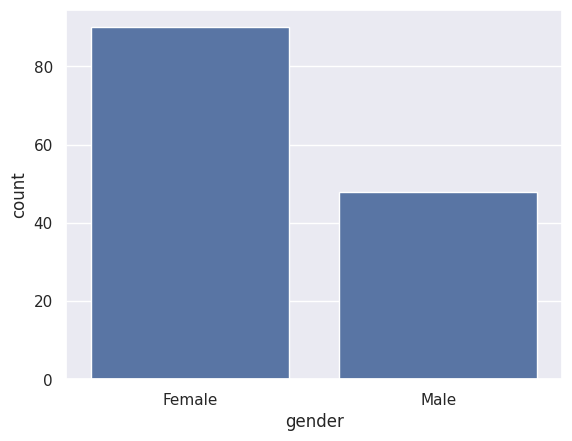

In [18]:
df.gender.value_counts()
# plot with seaborn
sns.countplot(data=df, x='gender', )

In [19]:
# Create boolean columns for each education type
df['has_cegep'] = df['prior_education'].str.lower().str.contains('cegep|dec', na=False)
df['has_bsc'] = df['prior_education'].str.lower().str.contains('bsc|b.sc|bachelors|bachelor|bhsc|bkin|h.bsc', na=False)
df['has_msc'] = df['prior_education'].str.lower().str.contains('msc|m.sc', na=False)
df['has_phd'] = df['prior_education'].str.lower().str.contains('phd', na=False)
df[['prior_education', 'has_cegep', 'has_bsc', 'has_msc', 'has_phd']]

,prior_education,has_cegep,has_bsc,has_msc,has_phd
0,"CEGEP, 2022",True,False,False,False
1,Graduate studies in Experimental Medicine,False,False,False,False
2,"Bsc, jd, llm",False,True,False,False
3,"CEGEP, Bsc, Msc",True,True,True,False
4,BSc Human Kinetics 2020 BSc Translational and...,False,True,False,False
...,...,...,...,...,...
133,Bsc Msc,False,True,True,False
134,"cegep, 2013 bsc, 2015 MSc, 2017 md 2025",True,True,True,False
135,"cegep in health sciences, 2016 1 year in cine...",True,True,False,False
136,"BSc, MSc studies,",False,True,True,False


In [20]:
# Clean up 'timepoint' to only show M1, M2, etc.
def clean_timepoint(val):
    if pd.isnull(val):
        return val
    val = str(val).strip().upper()
    # Extract M1, M2, etc. if present
    import re
    match = re.search(r'M\d+', val)
    if match:
        return match.group(0)
    return val

df['timepoint'] = df['timepoint'].apply(clean_timepoint)
df['timepoint'].value_counts()

timepoint
M3    43
M1    40
M2    38
M4    17
Name: count, dtype: int64

In [21]:
def checked(row):
    return row == 'Checked'

# Apply the checked function to all relevant columns
for col in df.columns:
    if col.startswith('which_cultural_identities_do_you_identify_as?_(select_that_apply)'):
        df[col] = df[col].apply(checked)
df


,record_id,timepoint,ppos,ppos_s,ppos_c,age,gender,gender_other,cultural_black,cultural_east_asian,...,other_languages,other_training,prior_education,site_of_study,intended_specialization,specialty,has_cegep,has_bsc,has_msc,has_phd
0,1,M2,88,40,48,21,Female,NaN,Unchecked,Unchecked,...,"Spanish (moderate), Arab (moderate)",NaN,"CEGEP, 2022",Montreal,Yes,Internal medicine,True,False,False,False
1,2,M4,75,29,46,42,Female,NaN,Unchecked,Unchecked,...,"Hindi, Punjabi, Urdu",NaN,Graduate studies in Experimental Medicine,Montreal,No,NaN,False,False,False,False
2,3,M3,76,38,38,30,Male,NaN,Unchecked,Unchecked,...,"Arabic, proficient",NaN,"Bsc, jd, llm",Montreal,Yes,Dermatology,False,True,False,False
3,5,M2,76,42,34,25,Male,NaN,Unchecked,Unchecked,...,none,NaN,"CEGEP, Bsc, Msc",Montreal,Yes,internal medicine - maybe medical oncology,True,True,True,False
4,7,M3,61,33,28,27,Male,NaN,Checked,Unchecked,...,Basic Japanese,NaN,BSc Human Kinetics 2020 BSc Translational and...,Montreal,Yes,Anesthesia,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,207,M3,41,20,21,28,Female,NaN,Checked,Unchecked,...,"Arabic, fluent",NaN,Bsc Msc,Montreal,No,NaN,False,True,True,False
134,208,M4,41,28,13,31,Female,NaN,Unchecked,Unchecked,...,"tamil, moderate",NaN,"cegep, 2013 bsc, 2015 MSc, 2017 md 2025",Montreal,Yes,family medicine,True,True,True,False
135,210,M4,56,28,28,28,Female,NaN,Unchecked,Unchecked,...,basic spanish,NaN,"cegep in health sciences, 2016 1 year in cine...",Montreal,Yes,I am starting residency in family medicine,True,True,False,False
136,212,M3,50,36,14,27,Male,NaN,Unchecked,Unchecked,...,Arabic moderate Spanish basic,NaN,"BSc, MSc studies,",Montreal,Yes,Family Medicine + 1 Emergency Medicine,False,True,True,False


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   record_id                 138 non-null    int64  
 1   timepoint                 138 non-null    object 
 2   ppos                      138 non-null    int64  
 3   ppos_s                    138 non-null    int64  
 4   ppos_c                    138 non-null    int64  
 5   age                       138 non-null    int64  
 6   gender                    138 non-null    object 
 7   gender_other              0 non-null      float64
 8   cultural_black            138 non-null    object 
 9   cultural_east_asian       138 non-null    object 
 10  cultural_indigenous       138 non-null    object 
 11  cultural_middle_eastern   138 non-null    object 
 12  cultural_latin_american   138 non-null    object 
 13  cultural_south_asian      138 non-null    object 
 14  cultural_s